# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json['coord']['lat']
        city_lng = weather_json['coord']['lon']
        city_max_temp = weather_json['main']['temp_max']
        city_humidity = weather_json['main']['humidity']
        city_clouds = weather_json['clouds']['all']
        city_wind = weather_json['wind']['speed']
        city_country = weather_json['sys']['country']
        city_date = weather_json['name']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hihifo
City not found. Skipping...
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | mar del plata
Processing Record 4 of Set 1 | nar'yan-mar
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | recreio
Processing Record 7 of Set 1 | shingu
Processing Record 8 of Set 1 | nuuk
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | al-`ula
City not found. Skipping...
Processing Record 11 of Set 1 | atafu village
Processing Record 12 of Set 1 | dhidhdhoo
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | hayma'
City not found. Skipping...
Processing Record 16 of Set 1 | utrik
Processing Record 17 of Set 1 | usinsk
Processing Record 18 of Set 1 | ilulissat
Processing Record 19 of Set 1 | anadyr
Processing Record 20 of Set 1 | along
Processing Record 21 of Set 1 | kon

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [11]:
# Display sample data

city_data_df['Max Temp'] = city_data_df['Max Temp'] - 273.15
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,-5.20,73,100,4.63,US,Jamestown
1,mar del plata,-38.0023,-57.5575,19.91,59,0,6.69,AR,Mar del Plata
2,nar'yan-mar,67.6713,53.0870,-7.52,94,100,5.61,RU,Naryan-Mar
3,hilo,19.7297,-155.0900,25.61,78,33,0.45,US,Hilo
4,recreio,-21.5250,-42.4692,24.70,81,63,1.30,BR,Recreio


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,-5.20,73,100,4.63,US,Jamestown
1,mar del plata,-38.0023,-57.5575,19.91,59,0,6.69,AR,Mar del Plata
2,nar'yan-mar,67.6713,53.0870,-7.52,94,100,5.61,RU,Naryan-Mar
3,hilo,19.7297,-155.0900,25.61,78,33,0.45,US,Hilo
4,recreio,-21.5250,-42.4692,24.70,81,63,1.30,BR,Recreio


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

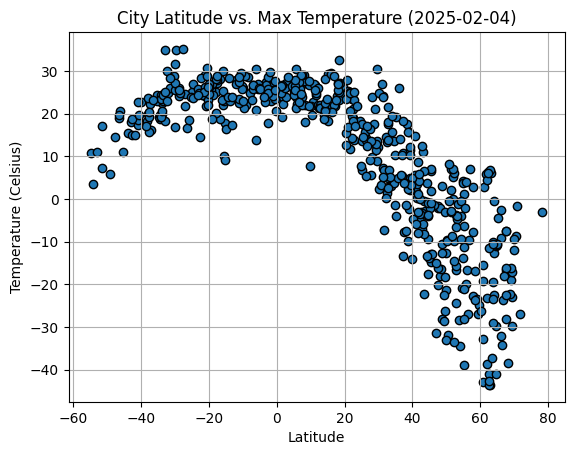

In [16]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2025-02-04)")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

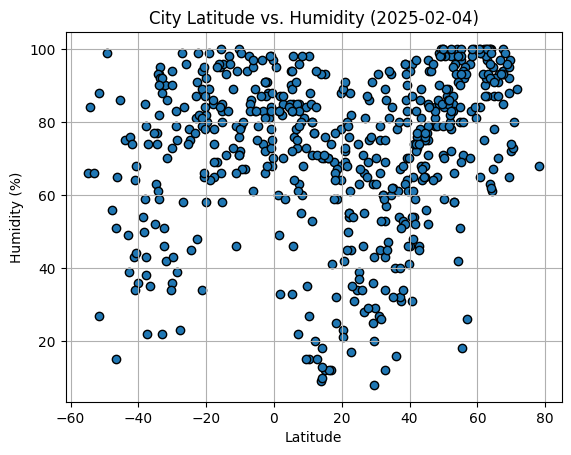

In [18]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2025-02-04)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

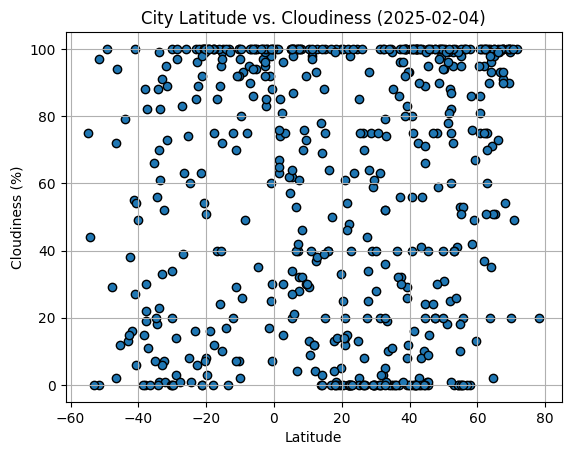

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2025-02-04)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

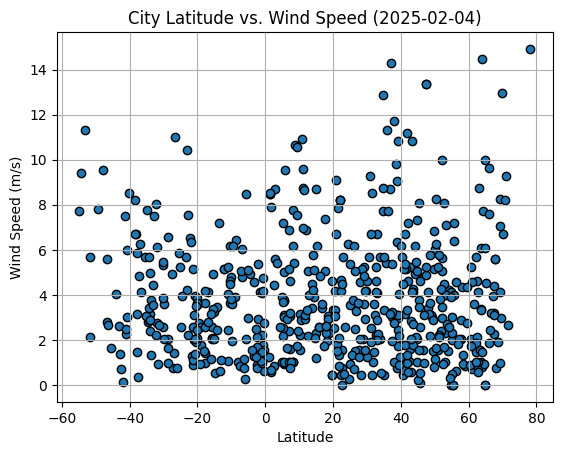

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2025-02-04)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [35]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, ylabel, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,'r-')
    plt.annotate(line_eq,text_coordinates,fontsize=10,color='red')
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    plt.title(title)
    print(f'The r-value is: {rvalue**2}')
    plt.show()

In [36]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
n_hem = city_data_df.loc[city_data_df['Lat'] >= 0]
n_hem_df = pd.DataFrame(n_hem)

# Display sample data
n_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,-5.20,73,100,4.63,US,Jamestown
2,nar'yan-mar,67.6713,53.0870,-7.52,94,100,5.61,RU,Naryan-Mar
3,hilo,19.7297,-155.0900,25.61,78,33,0.45,US,Hilo
5,shingu,33.7333,135.9833,3.13,47,10,5.70,JP,Shingū
6,nuuk,64.1835,-51.7216,-12.66,61,71,7.72,GL,Nuuk


In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
s_hem = city_data_df.loc[city_data_df['Lat'] <= 0]
s_hem_df = pd.DataFrame(s_hem)

# Display sample data
s_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mar del plata,-38.0023,-57.5575,19.91,59,0,6.69,AR,Mar del Plata
4,recreio,-21.5250,-42.4692,24.70,81,63,1.30,BR,Recreio
7,edinburgh of the seven seas,-37.0676,-12.3116,16.08,74,11,6.25,SH,Edinburgh of the Seven Seas
8,atafu village,-8.5421,-172.5159,28.67,67,49,6.42,TK,Atafu Village
10,bredasdorp,-34.5322,20.0403,18.73,77,18,2.81,ZA,Bredasdorp


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7164679589994932


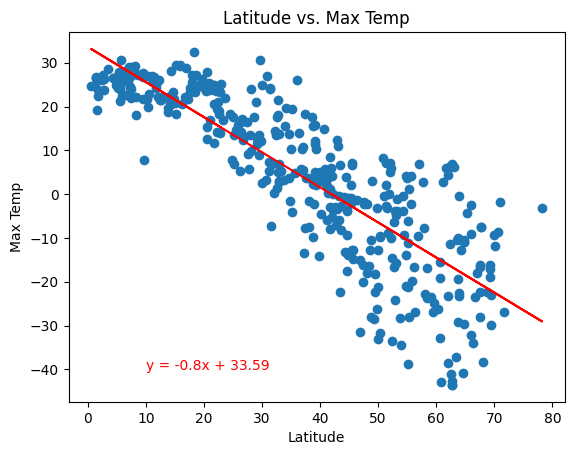

In [38]:
# Linear regression on Northern Hemisphere
x_values = n_hem_df['Lat']
y_values = n_hem_df['Max Temp']
plot_linear_regression(x_values, y_values, 'Max Temp', 'Latitude vs. Max Temp', (10, -40))

The r-value is: 0.23498851258548395


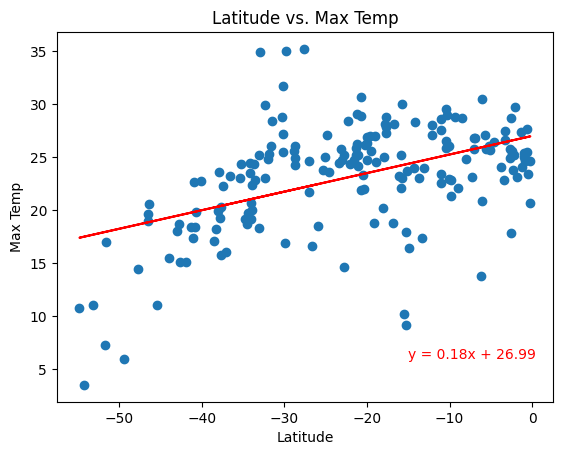

In [48]:
x_values = s_hem_df['Lat']
y_values = s_hem_df['Max Temp']
plot_linear_regression(x_values, y_values, 'Max Temp', 'Latitude vs. Max Temp', (-15, 6))

**Discussion about the linear relationship:** There is a positive correlation between the maximum temperature relative to the latitude of a given location. The nearer to the equator a location is, the higher their maximum temperature generally will be. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.12752542969802474


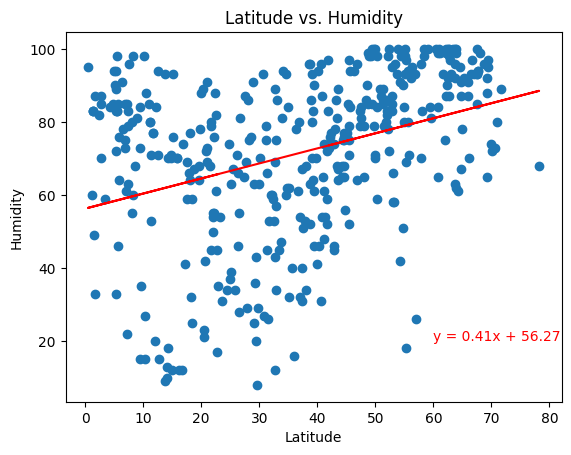

In [50]:
# Northern Hemisphere
x_values = n_hem_df['Lat']
y_values = n_hem_df['Humidity']
plot_linear_regression(x_values, y_values, 'Humidity', 'Latitude vs. Humidity', (60, 20))

The r-value is: 0.1775085553215893


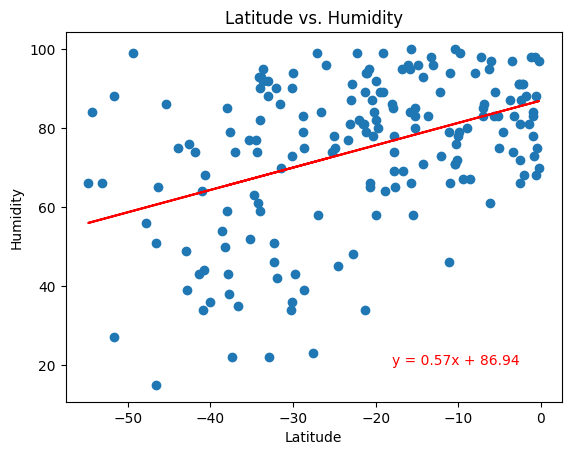

In [52]:
# Southern Hemisphere
x_values = s_hem_df['Lat']
y_values = s_hem_df['Humidity']
plot_linear_regression(x_values, y_values, 'Humidity', 'Latitude vs. Humidity', (-18, 20))

**Discussion about the linear relationship:** Based on the data, there does not appear to be a very strong correlation between latitude and humidity. This would seem to indicate that humidity is dependent on other factors in the region and not so much on latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.031407533960115114


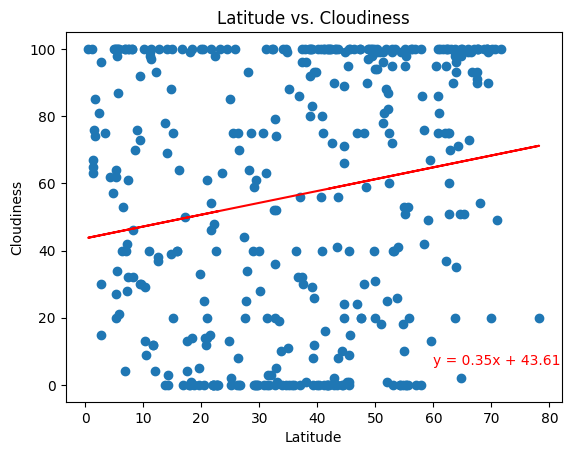

In [57]:
# Northern Hemisphere
x_values = n_hem_df['Lat']
y_values = n_hem_df['Cloudiness']
plot_linear_regression(x_values, y_values, 'Cloudiness', 'Latitude vs. Cloudiness', (60, 6))

The r-value is: 0.14800263695569787


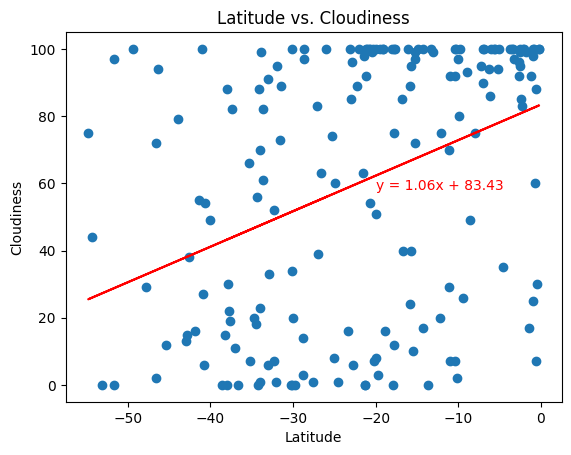

In [59]:
# Southern Hemisphere
x_values = s_hem_df['Lat']
y_values = s_hem_df['Cloudiness']
plot_linear_regression(x_values, y_values, 'Cloudiness', 'Latitude vs. Cloudiness', (-20, 58))

**Discussion about the linear relationship:** Based on the data, there does not appear to be any correlation between latitude and cloudiness. This would seem to indicate that cloudiness is dependent on other factors in the region and not on latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 2.5241771580878804e-05


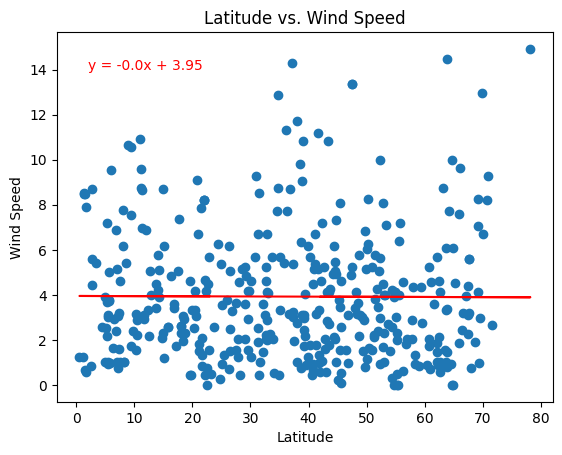

In [60]:
# Northern Hemisphere
x_values = n_hem_df['Lat']
y_values = n_hem_df['Wind Speed']
plot_linear_regression(x_values, y_values, 'Wind Speed', 'Latitude vs. Wind Speed', (2, 14))

The r-value is: 0.10135010420183906


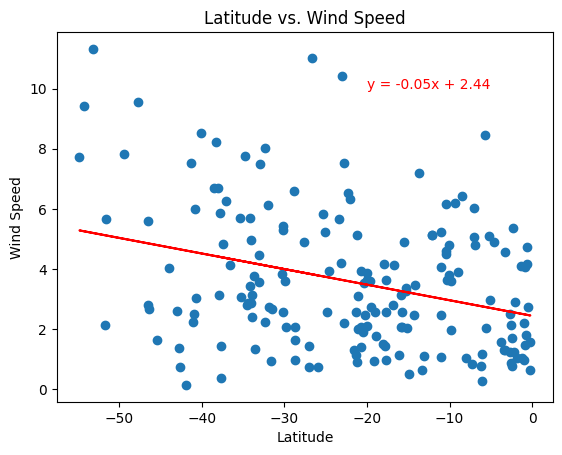

In [65]:
# Southern Hemisphere
x_values = s_hem_df['Lat']
y_values = s_hem_df['Wind Speed']
plot_linear_regression(x_values, y_values, 'Wind Speed', 'Latitude vs. Wind Speed', (-20, 10))

**Discussion about the linear relationship:** Based on the data, there does not appear to be a strong correlation between latitude and wind speed. Based on the presented data, it does appear that regardless of latitude, most locations have a wind speed of between 0 and 8 MPH. 